<a href="https://colab.research.google.com/github/mfarisherlansyah/fcc-time-series-visualizer/blob/main/page_view_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <b> Page View Time Series Visualizer </b> </h1>

This is a "clone" of freeCodeCamp's [Data Analysis with Python project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer) with the goal of being able to visualize time series data using line plot, bar plot, and box plot. The dataset contains the number of page views each day on the freeCodeCamp.org forum from 9 May 2016 to 3 December 2019. The data visualizations will help in understanding patterns in forum visits.

Before we get started, we import the important libraries.

Note that this project was done in Google Colab, so the io library was also imported so as to be able to read the uploaded dataset to the Colab notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

We upload the dataset to the Colab notebook.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fcc-forum-pageviews.csv to fcc-forum-pageviews.csv


Read the dataset.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['fcc-forum-pageviews.csv']))

We set the index to the date column. This may help in setting axes for visualization.

In [ ]:
df.sort_values(by = "date", inplace = True)
df.set_index('date', inplace = True)
df.index = pd.to_datetime(df.index)

We remove days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [ ]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df.head(10)

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
2016-06-07,18335
2016-06-08,18072
2016-06-09,18139
2016-06-14,19395


We start plotting the line plot. We set the x label to the "date" column and the y label to the "value" column, containing the number of page views.

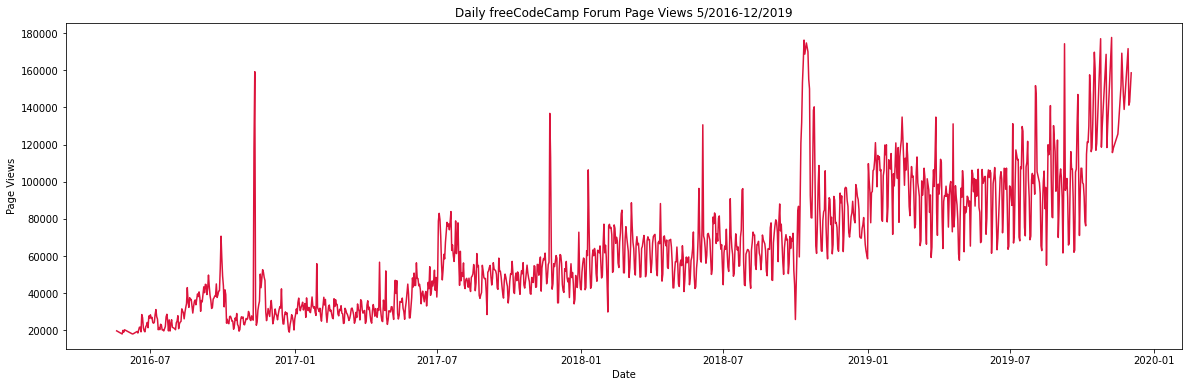

In [ ]:
def draw_line_plot():
  fig, ax = plt.subplots(figsize = (20, 6))
  ax.plot(df.index, df.value, color = "crimson")
  ax.set_xlabel("Date")
  ax.set_ylabel("Page Views")
  ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')

draw_line_plot()

From the above line plot, we can figure out that the number of page views increased shaply in the end of 2016, 2017, and 2018. And apparently the number of page views has an increasing trend over the years.

If I may have an opinion, the increasing trend may be due to the increasing number of people who are interested in learning how to code. If you have other opinions, give us your comment :)

Now we start visualizing the bar plot that shows average daily page views for each month grouped by year. We also want to show a legend that shows month labels and have a title of "Months".

This plot is relatively complex compared to the above line plot, because we need to create a pivot table, derived from the dataset, so that we have "year" as the index, "month" as the column, and "value" as the values of page views. We also have to implement a function so that the pivot table contains the average page views as the values.

As we want to visualize average daily page views for each month, we need to create a list containing the names of the months for easy understanding.

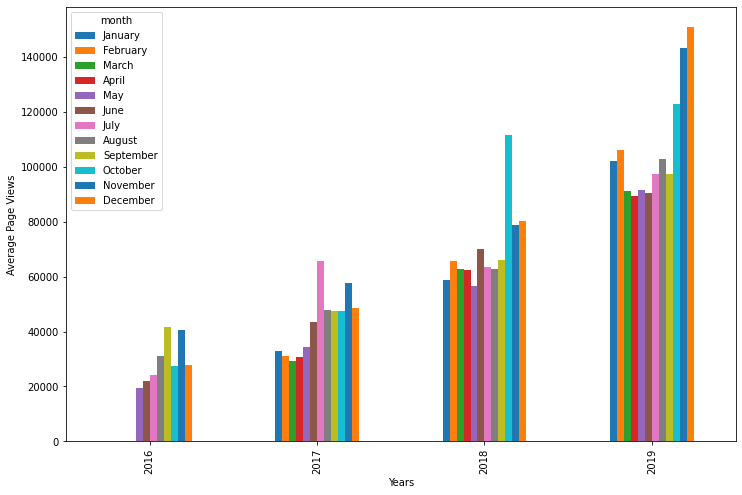

In [ ]:
def draw_bar_plot():
  df_bar = df.copy()
  
  months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  
  df_bar['month'] = df_bar.index.month
  df_bar['year'] = df_bar.index.year
  df_bar['month'] = df_bar['month'].apply([lambda n: months[n - 1]])
  df_bar['month'] = pd.Categorical(df_bar['month'], categories = months)

  df_pivot = pd.pivot_table(df_bar, values = "value", index = "year", columns = "month", aggfunc = np.mean)

  ax = df_pivot.plot(kind = 'bar')
  fig = ax.get_figure()

  fig.set_size_inches(12, 8)

  ax.set_xlabel("Years")
  ax.set_ylabel("Average Page Views")
  
  plt.show()

draw_bar_plot()

This is how the pivot table looks like:

In [ ]:
df_bar = df.copy()
  
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
  
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar['month'].apply([lambda n: months[n - 1]])
df_bar['month'] = pd.Categorical(df_bar['month'], categories = months)

df_pivot = pd.pivot_table(df_bar, values = "value", index = "year", columns = "month", aggfunc = np.mean)
df_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


As we can see from the above bar plot, we can identify that the greatest number of page views in each year, which we conclude appears during the second half of each year from the above line plot, occurs in September 2016, July 2017, October 2018, and December 2019.

Finally, we visualize the dataset using the box plot. We use Seaborn library in this part, as it provides an easy-to-use tool for creating box plots.

Box plots have advantages for the ease of visualizing basic statistical measures. For example, we may find the approximate location of the first quartile, third quartile, (obviously) interquartile range, median, outliers, etc.

We want to create two plots in one figure, so we split the figure into two.

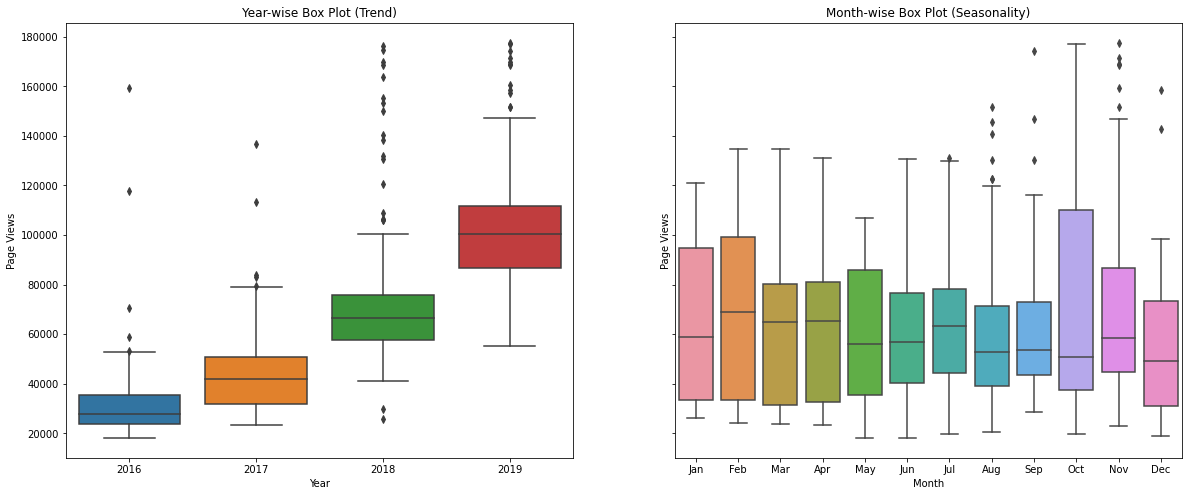

In [ ]:
def draw_box_plot():
  df_box = df.copy()

  months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
  
  df_box['month'] = df_box.index.month
  # df['year'] = df.index.year
  df_box['month'] = df_box['month'].apply([lambda n: months[n - 1]])
  df_box['month'] = pd.Categorical(df_box['month'], categories = months)

  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  # df_box['month'] = [d.strftime('%b') for d in df_box.date]

  # Draw box plots (using Seaborn)
  fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharey = True)
  axes[0].set_title("Year-wise Box Plot (Trend)")
  axes[1].set_title("Month-wise Box Plot (Seasonality)")

  sns.boxplot(ax = axes[0], data = df_box, x = "year", y = "value").set(xlabel = 'Year', ylabel = 'Page Views')
  sns.boxplot(ax = axes[1], data = df_box, x = "month", y = "value").set(xlabel = 'Month', ylabel = 'Page Views')

draw_box_plot()

From the above box plot, we can see that, year-wise, there are many outliers in 2018 and 2019 data, indicating sharp increases in forum page visits during those times. We can see that the visit trend is clearly increasing over the years.

We can also see that October is the month with the largest interquartile range, showing that October generally has the largest number of visits. We can also see outliers located above the maximum (Q3 + 1,5 × Interquartile Range) in August, September, November, and December, which support our opinion that the number of views increases sharply during the second half of each year.